In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os, re, tqdm, json
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, pearsonr, linregress

In [7]:
parameters_df = pd.read_csv('/home/gddaslab/mxp140/tcr_project_ultimate/results/parameters.csv')

In [8]:
parameters_df

,Patient,x1_panpep,x2_panpep,x2_0_panpep,nll_panpep,x1_vdjdb,x2_vdjdb,x2_0_vdjdb,nll_vdjdb,x1_mcpas,x2_mcpas,x2_0_mcpas,nll_mcpas,GBM
0,BrMET008,100.0,2.886680,8.846538,922.615085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,BrMET009,100.0,3.572298,23.240361,27696.184845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,BrMET010,100.0,3.224531,3.277990,14986.099347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,BrMET018,100.0,3.638777,33.409113,13246.981412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,BrMET019,100.0,0.706641,37.458902,3708.169727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
5,BrMET025,100.0,0.838772,77.756209,3779.158837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
6,BrMET027,100.0,5.857596,6.100669,12875.217368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
7,BrMET028,100.0,0.910071,8.256602,857.599437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
8,GBM032,100.0,9.630127,54.309981,12781.035066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
9,GBM052,100.0,6.729389,96.494318,11509.881528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [10]:
mean_krs = []
root_dir = '/home/gddaslab/mxp140/tcr_project_ultimate'
full_data = pd.read_csv(f'{root_dir}/data/BrMET_and_GBM_data-PANPEP.csv', sep=',')
max_kr = max(full_data['kr'].values)
patients = np.unique(full_data['Patient'])
for patient_id in patients:
    patient_data = full_data[full_data['Patient']==patient_id]
    kr_values = patient_data['kr'].values
    scaled_kr_values = kr_values / max_kr
    mean_krs.append(np.median(scaled_kr_values))

In [12]:
root_dir = '/home/gddaslab/mxp140/tcr_project_ultimate'
full_data = pd.read_csv(f'{root_dir}/data/BrMET_and_GBM_data-PANPEP.csv', sep=',')
max_kr = max(full_data['kr'].values)
patients = np.unique(full_data['Patient'])
all_dfs = []
for patient_id in patients:
    patient_data = full_data[full_data['Patient']==patient_id]
    kr_values = patient_data['kr'].values
    scaled_kr_values = kr_values / max_kr
    x2 = parameters_df[parameters_df['Patient']==patient_id]['x2_panpep'].values[0]
    df = pd.DataFrame({'Patient': [patient_id] * len(scaled_kr_values), 'Values': scaled_kr_values*x2})
    all_dfs.append(df)
all_dfs = pd.concat(all_dfs)

In [14]:
# Calculate mean_kr*x2
parameters_df['mean_kr_x2'] = parameters_df['x2_panpep'] * mean_krs

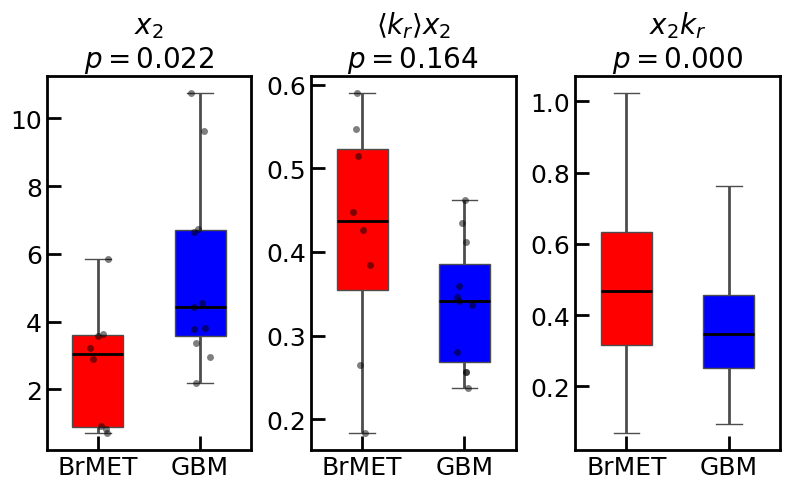

In [18]:
import seaborn as sns
parameters_df["GBM"] = parameters_df["Patient"].str.contains("GBM")
all_dfs ['GBM'] = all_dfs["Patient"].str.contains("GBM")
colors = {False: 'red', True: 'blue'}
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 5))
axes = [ax1, ax2, ax3]
titles = [r'$x_2$', r'$\langle k_r \rangle x_2$', r'$x_2k_r$']

# Create plots
sns.boxplot(
    x="GBM", 
    y='x2_panpep',
    data=parameters_df,
    hue="GBM",
    palette=colors,
    saturation=1,
    legend=False,
    width=0.5,
    ax=ax1,
    medianprops={"color": "black", "linewidth": 2},
    whiskerprops={"linewidth": 2},
    showfliers=False
)
sns.stripplot(
    x="GBM",
    y='x2_panpep', 
    data=parameters_df,
    color='black',
    alpha=0.5,
    ax=ax1,
    size=5
)
sns.boxplot(
    x="GBM", 
    y='mean_kr_x2',
    data=parameters_df,
    hue="GBM",
    palette=colors,
    saturation=1,
    legend=False,
    width=0.5,
    ax=ax2,
    medianprops={"color": "black", "linewidth": 2},
    whiskerprops={"linewidth": 2},
    showfliers=False
)
sns.stripplot(
    x="GBM",
    y='mean_kr_x2', 
    data=parameters_df,
    color='black',
    alpha=0.5,
    ax=ax2,
    size=5
)
sns.boxplot(
    x="GBM", 
    y='Values',
    data=all_dfs,
    hue="GBM",
    palette=colors,
    saturation=1,
    legend=False,
    width=0.5,
    ax=ax3,
    medianprops={"color": "black", "linewidth": 2},
    whiskerprops={"linewidth": 2},
    showfliers=False
)
# sns.stripplot(
#     x="GBM",
#     y='Values', 
#     data=all_dfs,
#     color='black',
#     alpha=0.05,
#     ax=ax2,
#     size=5
# )
ttest1 = ttest_ind(parameters_df[parameters_df['Patient'].str.contains("GBM")]['x2_panpep'].values, parameters_df[parameters_df['Patient'].str.contains("BrMET")]['x2_panpep'].values, equal_var=False)
ttest2 = ttest_ind(parameters_df[parameters_df['Patient'].str.contains("GBM")]['mean_kr_x2'].values, parameters_df[parameters_df['Patient'].str.contains("BrMET")]['mean_kr_x2'].values, equal_var=False)
ttest3 = ttest_ind(all_dfs[all_dfs['Patient'].str.contains("GBM")]['Values'].values, all_dfs[all_dfs['Patient'].str.contains("BrMET")]['Values'].values, equal_var=False)
p_values = [ttest1.pvalue, ttest2.pvalue, ttest3.pvalue]
for i, ax in enumerate(axes):
    # Configure each subplot
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["BrMET", "GBM"])
    ax.set_title(titles[i] + '\n' + f'$p={p_values[i]:.3f}$', fontsize=20)
    ax.set_xlabel("")
    ax.set_ylabel("")

    # Set formatting
    xtick_labels, ytick_labels = ax.get_xticklabels(), ax.get_yticklabels()
    for label in xtick_labels + ytick_labels:
        label.set_fontsize(24)
    ax.tick_params(axis="x", which="major", direction="in", length=10, width=2, labelsize=18)
    ax.tick_params(axis="x", which="minor", direction="in", length=5, width=2, labelsize=18)
    ax.tick_params(axis="y", which="major", direction="in", length=10, width=2, labelsize=18)
    ax.tick_params(axis="y", which="minor", direction="in", length=5, width=2, labelsize=18)
    ax.spines["bottom"].set_linewidth(2)
    ax.spines["left"].set_linewidth(2)
    ax.spines["top"].set_linewidth(2)
    ax.spines["right"].set_linewidth(2)
    ax.yaxis.labelpad = 20
    ax.xaxis.labelpad = 20

plt.tight_layout()
plt.show()

# PARAMETERS BY REGIONS

In [19]:
import json

In [20]:
with open(f'/home/gddaslab/mxp140/tcr_project_ultimate/results/parameters_by_regions.json', 'r+') as f:
    params_by_regions = json.load(f)

In [22]:
mean_krs_by_regions = []
for patient_id in params_by_regions.keys():
    for region in params_by_regions[patient_id].keys():
        df = pd.read_csv(f'{root_dir}/data/glioblastoma_data/PANPEP/{patient_id}/{patient_id}_{region}.csv', sep=',')
        kr_values = df['kr'].values
        scaled_kr_values = kr_values/max_kr
        mean_krs_by_regions.append(np.median(scaled_kr_values))

In [23]:
params_by_regions_modified = {key +'-'+ subkey: params_by_regions[key][subkey] for key in params_by_regions.keys() for subkey in params_by_regions[key].keys()}
params_by_region_df = pd.DataFrame([(k, v[0] if isinstance(v, list) and len(v) > 0 else None, v[1] if isinstance(v, list) and len(v) > 1 else None) 
                                    for k,v in params_by_regions_modified.items()],
                                columns=['Patient', 'x1', 'x2'])
params_by_region_df["GBM"] = params_by_region_df["Patient"].str.contains("GBM")
params_by_region_df = params_by_region_df.dropna()
# Calculate mean_kr*x2
params_by_region_df['mean_kr_x2'] = params_by_region_df['x2'] * mean_krs_by_regions

In [24]:
params_by_regions['BrMET008']['region1'][1]

3.0642896110679194

In [27]:
all_dfs_by_regions = []
for patient_id in params_by_regions.keys():
    for region in params_by_regions[patient_id].keys():
        df = pd.read_csv(f'{root_dir}/data/glioblastoma_data/PANPEP/{patient_id}/{patient_id}_{region}.csv', sep=',')
        kr_values = df['kr'].values
        scaled_kr_values = kr_values/max_kr
        x2 = params_by_regions[patient_id][region][1]
        df = pd.DataFrame({'Patient': [patient_id+'-'+region] * len(scaled_kr_values), 'Values': scaled_kr_values*x2})
        all_dfs_by_regions.append(df)
all_dfs_by_regions = pd.concat(all_dfs_by_regions)
        

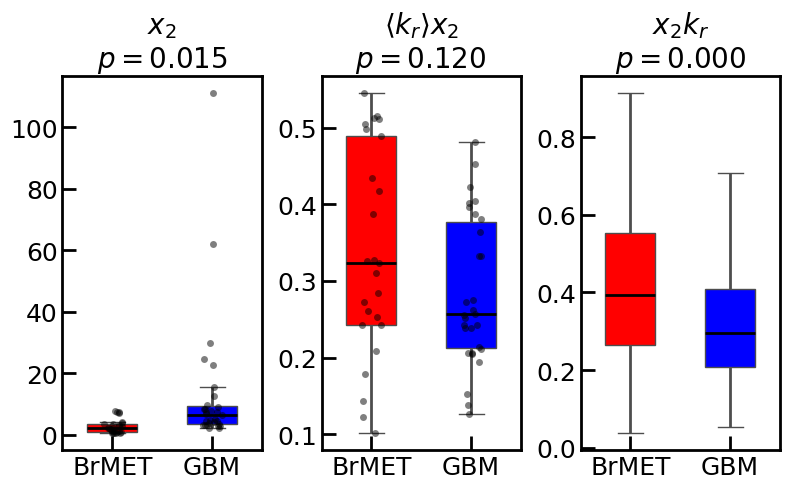

In [28]:
params_by_region_df["GBM"] = params_by_region_df["Patient"].str.contains("GBM")
all_dfs_by_regions ['GBM'] = all_dfs_by_regions["Patient"].str.contains("GBM")
colors = {False: 'red', True: 'blue'}
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 5))
axes = [ax1, ax2, ax3]
titles = [r'$x_2$', r'$\langle k_r \rangle x_2$', r'$x_2k_r$']

# Create plots
sns.boxplot(
    x="GBM", 
    y='x2',
    data=params_by_region_df,
    hue="GBM",
    palette=colors,
    saturation=1,
    legend=False,
    width=0.5,
    ax=ax1,
    medianprops={"color": "black", "linewidth": 2},
    whiskerprops={"linewidth": 2},
    showfliers=False
)
sns.stripplot(
    x="GBM",
    y='x2', 
    data=params_by_region_df,
    color='black',
    alpha=0.5,
    ax=ax1,
    size=5
)
sns.boxplot(
    x="GBM", 
    y='mean_kr_x2',
    data=params_by_region_df,
    hue="GBM",
    palette=colors,
    saturation=1,
    legend=False,
    width=0.5,
    ax=ax2,
    medianprops={"color": "black", "linewidth": 2},
    whiskerprops={"linewidth": 2},
    showfliers=False
)
sns.stripplot(
    x="GBM",
    y='mean_kr_x2', 
    data=params_by_region_df,
    color='black',
    alpha=0.5,
    ax=ax2,
    size=5
)
sns.boxplot(
    x="GBM", 
    y='Values',
    data=all_dfs_by_regions,
    hue="GBM",
    palette=colors,
    saturation=1,
    legend=False,
    width=0.5,
    ax=ax3,
    medianprops={"color": "black", "linewidth": 2},
    whiskerprops={"linewidth": 2},
    showfliers=False
)
ttest1 = ttest_ind(params_by_region_df[params_by_region_df['Patient'].str.contains("GBM")]['x2'].values, params_by_region_df[params_by_region_df['Patient'].str.contains("BrMET")]['x2'].values, equal_var=False)
ttest2 = ttest_ind(params_by_region_df[params_by_region_df['Patient'].str.contains("GBM")]['mean_kr_x2'].values, params_by_region_df[params_by_region_df['Patient'].str.contains("BrMET")]['mean_kr_x2'].values, equal_var=False)
ttest3 = ttest_ind(all_dfs_by_regions[all_dfs_by_regions['Patient'].str.contains("GBM")]['Values'].values, all_dfs_by_regions[all_dfs_by_regions['Patient'].str.contains("BrMET")]['Values'].values, equal_var=False)
p_values = [ttest1.pvalue, ttest2.pvalue, ttest3.pvalue]
for i, ax in enumerate(axes):
    # Configure each subplot
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["BrMET", "GBM"])
    ax.set_title(titles[i] + '\n' + f'$p={p_values[i]:.3f}$', fontsize=20)
    ax.set_xlabel("")
    ax.set_ylabel("")

    # Set formatting
    xtick_labels, ytick_labels = ax.get_xticklabels(), ax.get_yticklabels()
    for label in xtick_labels + ytick_labels:
        label.set_fontsize(24)
    ax.tick_params(axis="x", which="major", direction="in", length=10, width=2, labelsize=18)
    ax.tick_params(axis="x", which="minor", direction="in", length=5, width=2, labelsize=18)
    ax.tick_params(axis="y", which="major", direction="in", length=10, width=2, labelsize=18)
    ax.tick_params(axis="y", which="minor", direction="in", length=5, width=2, labelsize=18)
    ax.spines["bottom"].set_linewidth(2)
    ax.spines["left"].set_linewidth(2)
    ax.spines["top"].set_linewidth(2)
    ax.spines["right"].set_linewidth(2)
    ax.yaxis.labelpad = 20
    ax.xaxis.labelpad = 20

plt.tight_layout()
plt.show()

In [29]:
a = all_dfs_by_regions[all_dfs_by_regions['Patient'].str.contains("GBM")]['Values'].values
b = all_dfs_by_regions[all_dfs_by_regions['Patient'].str.contains("BrMET")]['Values'].values
mean_a, mean_b = np.mean(a), np.mean(b)
var_a, var_b = np.var(a, ddof=1), np.var(b, ddof=1)
n_a, n_b = len(a), len(b)
t_stat = (mean_a - mean_b)/np.sqrt((var_a/n_a)+(var_b/n_b))
dof = ((var_a / n_a) + (var_b / n_b))**2 / \
(((var_a / n_a)**2) / (n_a - 1) + ((var_b / n_b)**2) / (n_b - 1))
from scipy.stats import t
p_value = 2 * (1 - t.cdf(np.abs(t_stat), dof))  # Two-tailed test
print(t_stat, dof, p_value)

-107.8136079827952 138540.05387200697 0.0


# VERSUS MACROPHAGES

In [35]:
with open(f"/home/gddaslab/mxp140/TCR_PROJECT_OLD/tcr_project_git/data/cell_popn.json", 'r+') as f:
    cell_popn = json.load(f)
    macrophages = cell_popn['macrophages']
    exhausted_cd8 = cell_popn['Exhausted CD8']

In [36]:
macrophages_intensity = {}
for key in macrophages.keys():
    for sub_key in macrophages[key].keys():
        list_ = macrophages[key][sub_key]
        if key not in macrophages_intensity:
            macrophages_intensity[key] = {}
        macrophages_intensity[key]['region'+sub_key] = 0.299*list_[0] + 0.587*list_[1] + 0.114*list_[2]

exhausted_cd8_intensity = {}
for key in exhausted_cd8.keys():
    for sub_key in exhausted_cd8[key].keys():
        list_ = exhausted_cd8[key][sub_key]
        if key not in exhausted_cd8_intensity:
            exhausted_cd8_intensity[key] = {}
        exhausted_cd8_intensity[key]['region'+sub_key] = 0.299*list_[0] + 0.587*list_[1] + 0.114*list_[2]

In [32]:
macrophage_df = pd.DataFrame({f"{patient}-{region}": values 
             for patient, regions in macrophages_intensity.items()
             for region, values in regions.items()}, 
            index=['intensity']).transpose().reset_index().rename(columns={'index': 'Patient'})
macrophage_df

,Patient,intensity
0,BrMET008-region1,215.706
1,BrMET008-region2,220.368
2,BrMET008-region3,218.510
3,BrMET008-region4,241.199
4,BrMET009-region1,156.003
...,...,...
61,GBM074-region2,192.861
62,GBM074-region3,191.274
63,GBM079-region1,201.746
64,GBM079-region2,187.655


In [37]:
exhausted_cd8_df = pd.DataFrame({f"{patient}-{region}": values 
             for patient, regions in exhausted_cd8_intensity.items()
             for region, values in regions.items()}, 
            index=['intensity']).transpose().reset_index().rename(columns={'index': 'Patient'})
exhausted_cd8_df

,Patient,intensity
0,BrMET008-region1,214.891
1,BrMET008-region2,220.368
2,BrMET008-region3,220.368
3,BrMET008-region4,226.486
4,BrMET009-region1,192.519
...,...,...
61,GBM074-region2,240.982
62,GBM074-region3,228.817
63,GBM079-region1,223.400
64,GBM079-region2,226.888


In [38]:
from scipy.stats import pearsonr, linregress

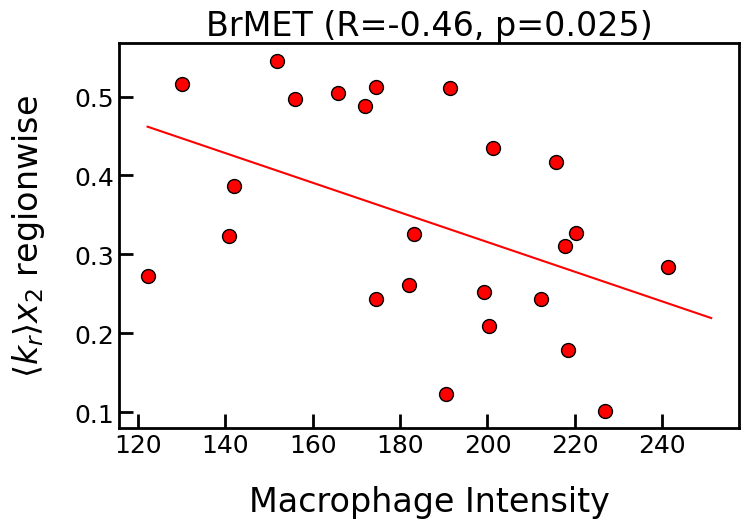

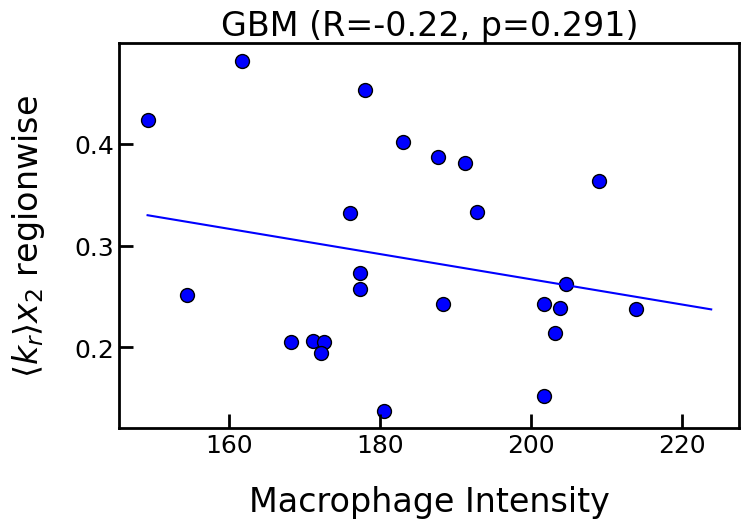

In [34]:
req_df = pd.merge(left=macrophage_df, right=params_by_region_df, how='inner', on='Patient')
# Extract x and y values for matching keys
x_values = req_df['intensity'].values
x2_values = req_df['mean_kr_x2'].values

brmet_mask = req_df['Patient'].str.contains('BrMET')
gbm_mask = req_df['Patient'].str.contains('GBM')

corr_all = pearsonr(x_values, x2_values)
corr_brmet = pearsonr(x_values[brmet_mask], x2_values[brmet_mask])
corr_gbm = pearsonr(x_values[gbm_mask], x2_values[gbm_mask])

mask = [brmet_mask, gbm_mask]
colors = ['red', 'blue']
titles = [f'BrMET (R={corr_brmet.statistic:.2f}, p={corr_brmet.pvalue:.3f})', f'GBM (R={corr_gbm.statistic:.2f}, p={corr_gbm.pvalue:.3f})']
for i in range(2):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
    x = x_values[mask[i]]
    y = x2_values[mask[i]]
    ax.scatter(x, y, s=100, color=colors[i], edgecolor='black', alpha=1)
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    x_range = np.linspace(min(x), max(x)+10, 1000)
    ax.plot(x_range, slope * x_range + intercept, color=colors[i], )
    ax.set_xlabel('Macrophage Intensity', fontsize=24)
    ax.set_ylabel(r'$\langle k_r \rangle x_2$ regionwise', fontsize=24)
    ax.tick_params(axis='both', which='major', labelsize=16)
    xtick_labels, ytick_labels = ax.get_xticklabels(), ax.get_yticklabels()
    for label in xtick_labels + ytick_labels:
        label.set_fontsize(24)
    ax.tick_params(
        axis="x", which="major", direction="in", length=10, width=2, labelsize=18
    )
    ax.tick_params(
        axis="x", which="minor", direction="in", length=5, width=2, labelsize=18
    )
    ax.tick_params(
        axis="y", which="major", direction="in", length=10, width=2, labelsize=18
    )
    ax.tick_params(
        axis="y", which="minor", direction="in", length=5, width=2, labelsize=18
    )
    ax.spines["bottom"].set_linewidth(2)
    ax.spines["left"].set_linewidth(2)
    ax.spines["top"].set_linewidth(2)
    ax.spines["right"].set_linewidth(2)
    ax.yaxis.labelpad = 20
    ax.xaxis.labelpad = 20
    ax.set_title(titles[i], fontsize=24)
    plt.show()

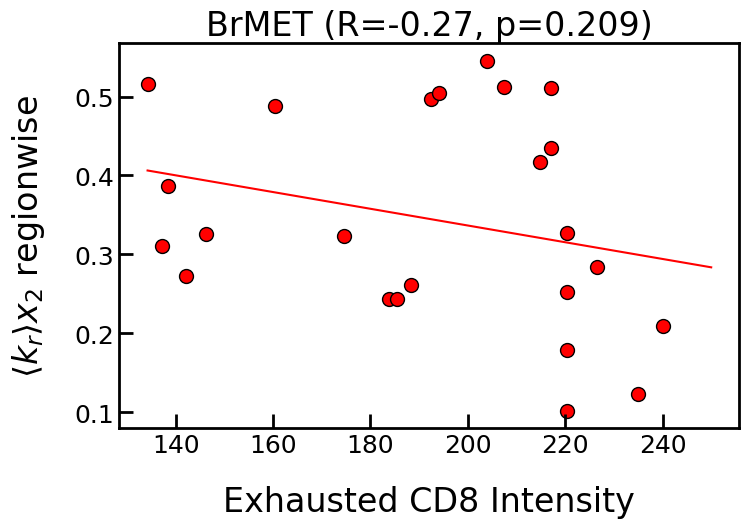

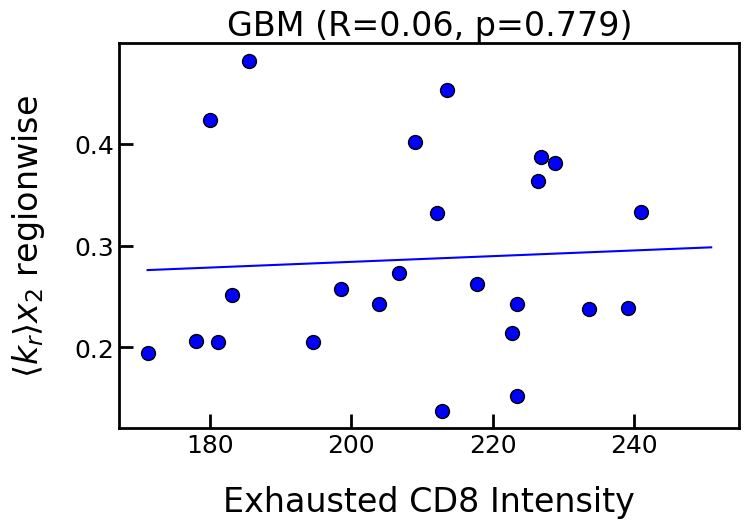

In [39]:
req_df = pd.merge(left=exhausted_cd8_df, right=params_by_region_df, how='inner', on='Patient')
# Extract x and y values for matching keys
x_values = req_df['intensity'].values
x2_values = req_df['mean_kr_x2'].values

brmet_mask = req_df['Patient'].str.contains('BrMET')
gbm_mask = req_df['Patient'].str.contains('GBM')

corr_all = pearsonr(x_values, x2_values)
corr_brmet = pearsonr(x_values[brmet_mask], x2_values[brmet_mask])
corr_gbm = pearsonr(x_values[gbm_mask], x2_values[gbm_mask])

mask = [brmet_mask, gbm_mask]
colors = ['red', 'blue']
titles = [f'BrMET (R={corr_brmet.statistic:.2f}, p={corr_brmet.pvalue:.3f})', f'GBM (R={corr_gbm.statistic:.2f}, p={corr_gbm.pvalue:.3f})']
for i in range(2):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
    x = x_values[mask[i]]
    y = x2_values[mask[i]]
    ax.scatter(x, y, s=100, color=colors[i], edgecolor='black', alpha=1)
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    x_range = np.linspace(min(x), max(x)+10, 1000)
    ax.plot(x_range, slope * x_range + intercept, color=colors[i], )
    ax.set_xlabel('Exhausted CD8 Intensity', fontsize=24)
    ax.set_ylabel(r'$\langle k_r \rangle x_2$ regionwise', fontsize=24)
    ax.tick_params(axis='both', which='major', labelsize=16)
    xtick_labels, ytick_labels = ax.get_xticklabels(), ax.get_yticklabels()
    for label in xtick_labels + ytick_labels:
        label.set_fontsize(24)
    ax.tick_params(
        axis="x", which="major", direction="in", length=10, width=2, labelsize=18
    )
    ax.tick_params(
        axis="x", which="minor", direction="in", length=5, width=2, labelsize=18
    )
    ax.tick_params(
        axis="y", which="major", direction="in", length=10, width=2, labelsize=18
    )
    ax.tick_params(
        axis="y", which="minor", direction="in", length=5, width=2, labelsize=18
    )
    ax.spines["bottom"].set_linewidth(2)
    ax.spines["left"].set_linewidth(2)
    ax.spines["top"].set_linewidth(2)
    ax.spines["right"].set_linewidth(2)
    ax.yaxis.labelpad = 20
    ax.xaxis.labelpad = 20
    ax.set_title(titles[i], fontsize=24)
    plt.show()

In [32]:
exponents_df = pd.read_csv('/home/gddaslab/mxp140/tcr_project_ultimate/results/exponents_from_curve_fit.csv', sep=',', usecols=['Patient', 'alpha'])
params_and_alphas_df = pd.merge(parameters_df[['Patient', 'mean_kr_x2']], exponents_df, how='inner', on='Patient')
params_and_alphas_df


,Patient,mean_kr_x2,alpha
0,BrMET008,0.448006,2.353112
1,BrMET009,0.590294,2.201779
2,BrMET010,0.384595,2.656231
3,BrMET018,0.546391,2.296292
4,BrMET019,0.426257,2.219059
5,BrMET025,0.264755,2.704181
6,BrMET027,0.515239,2.269847
7,BrMET028,0.183416,2.280026
8,GBM032,0.434642,2.345271
9,GBM052,0.340781,2.371814


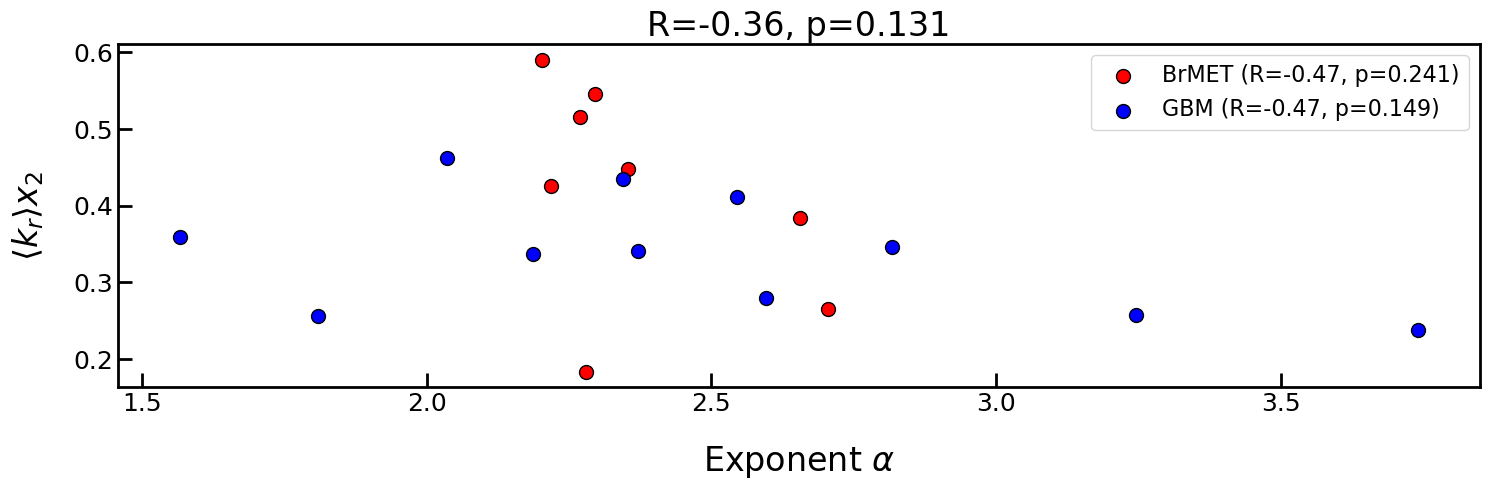

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
brmet_mask = params_and_alphas_df['Patient'].str.contains('BrMET')
gbm_mask = params_and_alphas_df['Patient'].str.contains('GBM')
mean_kr_x2_values, alpha_values = params_and_alphas_df['mean_kr_x2'].values, params_and_alphas_df['alpha'].values
corr_all = pearsonr(mean_kr_x2_values, alpha_values)
corr_brmet = pearsonr(mean_kr_x2_values[brmet_mask], alpha_values[brmet_mask])
corr_gbm = pearsonr(mean_kr_x2_values[gbm_mask], alpha_values[gbm_mask])
ax.scatter(alpha_values[brmet_mask], mean_kr_x2_values[brmet_mask], s=100, color='red', edgecolor='black', alpha=1, label=f'BrMET (R={corr_brmet.statistic:.2f}, p={corr_brmet.pvalue:.3f})')
ax.scatter(alpha_values[gbm_mask], mean_kr_x2_values[gbm_mask], s=100, color='blue', edgecolor='black', alpha=1, label=f'GBM (R={corr_gbm.statistic:.2f}, p={corr_gbm.pvalue:.3f})')
ax.legend(fontsize=16)
ax.set_xlabel(r'Exponent $\alpha$', fontsize=24)
ax.set_ylabel(r'$\langle k_r \rangle x_2$', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=16)
xtick_labels, ytick_labels = ax.get_xticklabels(), ax.get_yticklabels()
for label in xtick_labels + ytick_labels:
    label.set_fontsize(24)
ax.tick_params(
    axis="x", which="major", direction="in", length=10, width=2, labelsize=18
)
ax.tick_params(
    axis="x", which="minor", direction="in", length=5, width=2, labelsize=18
)
ax.tick_params(
    axis="y", which="major", direction="in", length=10, width=2, labelsize=18
)
ax.tick_params(
    axis="y", which="minor", direction="in", length=5, width=2, labelsize=18
)
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.spines["top"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
ax.yaxis.labelpad = 20
ax.xaxis.labelpad = 20

ax.set_title(f'R={corr_all.statistic:.2f}, p={corr_all.pvalue:.3f}', fontsize=24)

plt.tight_layout()
plt.show()

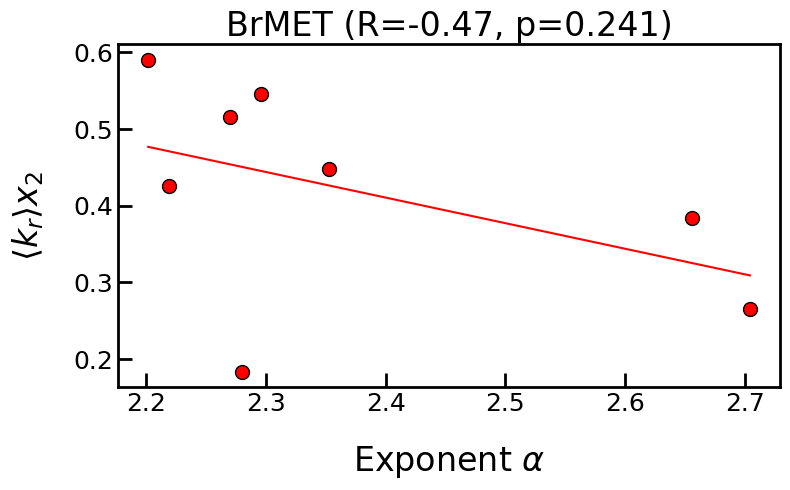

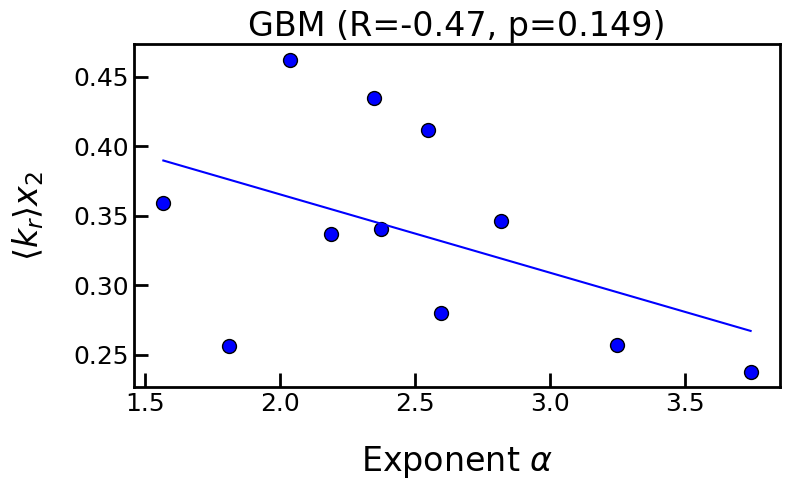

In [40]:
brmet_mask = params_and_alphas_df['Patient'].str.contains('BrMET')
gbm_mask = params_and_alphas_df['Patient'].str.contains('GBM')
mean_kr_x2_values, alpha_values = params_and_alphas_df['mean_kr_x2'].values, params_and_alphas_df['alpha'].values
corr_all = pearsonr(mean_kr_x2_values, alpha_values)
corr_brmet = pearsonr(mean_kr_x2_values[brmet_mask], alpha_values[brmet_mask])
corr_gbm = pearsonr(mean_kr_x2_values[gbm_mask], alpha_values[gbm_mask])
mask = [brmet_mask, gbm_mask]
colors = ['red', 'blue']
titles = [f'BrMET (R={corr_brmet.statistic:.2f}, p={corr_brmet.pvalue:.3f})', f'GBM (R={corr_gbm.statistic:.2f}, p={corr_gbm.pvalue:.3f})']
for i in range(2):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
    x = alpha_values[mask[i]]
    y = mean_kr_x2_values[mask[i]]
    ax.scatter(x, y, s=100, color=colors[i], edgecolor='black', alpha=1)
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    x_range = np.linspace(min(x), max(x), 1000)
    ax.plot(x_range, slope * x_range + intercept, color=colors[i], )
    ax.set_xlabel(r'Exponent $\alpha$', fontsize=24)
    ax.set_ylabel(r'$\langle k_r \rangle x_2$', fontsize=24)
    ax.tick_params(axis='both', which='major', labelsize=16)
    xtick_labels, ytick_labels = ax.get_xticklabels(), ax.get_yticklabels()
    for label in xtick_labels + ytick_labels:
        label.set_fontsize(24)
    ax.tick_params(
        axis="x", which="major", direction="in", length=10, width=2, labelsize=18
    )
    ax.tick_params(
        axis="x", which="minor", direction="in", length=5, width=2, labelsize=18
    )
    ax.tick_params(
        axis="y", which="major", direction="in", length=10, width=2, labelsize=18
    )
    ax.tick_params(
        axis="y", which="minor", direction="in", length=5, width=2, labelsize=18
    )
    ax.spines["bottom"].set_linewidth(2)
    ax.spines["left"].set_linewidth(2)
    ax.spines["top"].set_linewidth(2)
    ax.spines["right"].set_linewidth(2)
    ax.yaxis.labelpad = 20
    ax.xaxis.labelpad = 20

    ax.set_title(titles[i], fontsize=24)

    plt.tight_layout()
    plt.show()

### Newer plots

         Patient     x2*kr       dataset
0       BrMET008  0.467741  BrMET-PANPEP
1       BrMET008  0.261076  BrMET-PANPEP
2       BrMET008  0.346787  BrMET-PANPEP
3       BrMET008  0.567928  BrMET-PANPEP
4       BrMET008  0.429665  BrMET-PANPEP
...          ...       ...           ...
122979    GBM079  0.201512     GBM-MCPAS
122980    GBM079  0.245975     GBM-MCPAS
122981    GBM079   0.23613     GBM-MCPAS
122982    GBM079  0.271993     GBM-MCPAS
122983    GBM079  0.367721     GBM-MCPAS

[371450 rows x 3 columns]
P-VALUE TABLE


,Dataset,BrMET-PANPEP,BrMET-VDJDB,BrMET-MCPAS,GBM-PANPEP,GBM-VDJDB,GBM-MCPAS
0,BrMET-PANPEP,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,BrMET-VDJDB,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000
2,BrMET-MCPAS,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
3,GBM-PANPEP,0.0000,0.0000,0.0000,1.0000,0.0000,0.8268
4,GBM-VDJDB,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
5,GBM-MCPAS,0.0000,0.0000,0.0000,0.8268,0.0000,1.0000


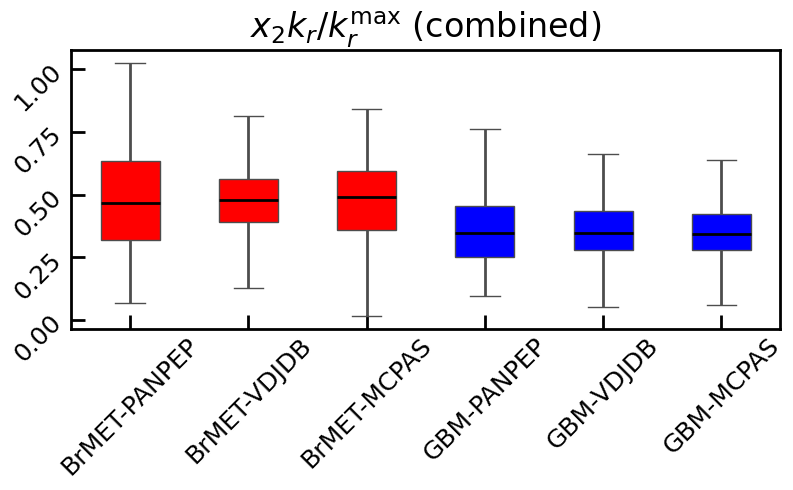

In [2]:
parameters_df = pd.read_excel('/home/gddaslab/mxp140/tcr_project_ultimate/results/results.xlsx', engine='openpyxl', sheet_name='parameters')
full_data_panpep = pd.read_csv('/home/gddaslab/mxp140/tcr_project_ultimate/data/BrMET_and_GBM_data-PANPEP.csv', sep=',')
full_data_vdjdb = pd.read_csv('/home/gddaslab/mxp140/tcr_project_ultimate/data/BrMET_and_GBM_data-ERGO-II.csv', sep=',', usecols=['Patient', 'CDR3', 'counts', 'kr_vdjdb'])
full_data_vdjdb.rename(columns={'kr_vdjdb':'kr'}, inplace=True)
full_data_mcpas = pd.read_csv('/home/gddaslab/mxp140/tcr_project_ultimate/data/BrMET_and_GBM_data-ERGO-II.csv', sep=',', usecols=['Patient', 'CDR3', 'counts', 'kr_mcpas'])
full_data_mcpas.rename(columns={'kr_mcpas':'kr'}, inplace=True)
max_kr_panpep = max(full_data_panpep['kr'])
max_kr_vdjdb = max(full_data_vdjdb['kr'])
max_kr_mcpas = max(full_data_mcpas['kr'])
max_kr_dict = {'panpep':max_kr_panpep, 'vdjdb':max_kr_vdjdb, 'mcpas':max_kr_mcpas}

########################################## PANPEP ##########################################
x2_times_kr_values_panpep_df = pd.DataFrame({f'Patient':full_data_panpep['Patient'].values})
x2_times_kr_values_panpep_df['x2*kr'] = None
x2_times_kr_values_panpep_df['dataset'] = None
for patient_id in full_data_panpep['Patient'].unique():
    # print(patient_id)
    x2_value = parameters_df[(parameters_df['Patient'] == patient_id) & (parameters_df['Region'] == 'combined')]['x2_panpep'].values[0]
    scaled_kr_values = full_data_panpep[full_data_panpep['Patient'] == patient_id]['kr'].values/max_kr_dict.get('panpep')
    x2_times_kr_values_panpep_df.loc[x2_times_kr_values_panpep_df['Patient'] == patient_id, 'x2*kr'] = x2_value * scaled_kr_values
    x2_times_kr_values_panpep_df.loc[x2_times_kr_values_panpep_df['Patient'] == patient_id, 'dataset'] = f'{re.split(r'\d+', patient_id)[0]}-PANPEP'
# print(x2_times_kr_values_panpep_df.head())

########################################## VDJDB ##########################################
x2_times_kr_values_vdjdb_df = pd.DataFrame({f'Patient':full_data_vdjdb['Patient'].values})
x2_times_kr_values_vdjdb_df['x2*kr'] = None
x2_times_kr_values_vdjdb_df['dataset'] = None
for patient_id in full_data_vdjdb['Patient'].unique():
    # print(patient_id)
    x2_value = parameters_df[(parameters_df['Patient'] == patient_id) & (parameters_df['Region'] == 'combined')]['x2_vdjdb'].values[0]
    scaled_kr_values = full_data_vdjdb[full_data_vdjdb['Patient'] == patient_id]['kr'].values/max_kr_dict.get('vdjdb')
    x2_times_kr_values_vdjdb_df.loc[x2_times_kr_values_vdjdb_df['Patient'] == patient_id, 'x2*kr'] = x2_value * scaled_kr_values
    x2_times_kr_values_vdjdb_df.loc[x2_times_kr_values_vdjdb_df['Patient'] == patient_id, 'dataset'] = f'{re.split(r'\d+', patient_id)[0]}-VDJDB'
# print(x2_times_kr_values_vdjdb_df.head())

########################################## MCPAS ##########################################
x2_times_kr_values_mcpas_df = pd.DataFrame({f'Patient':full_data_mcpas['Patient'].values})
x2_times_kr_values_mcpas_df['x2*kr'] = None
x2_times_kr_values_mcpas_df['dataset'] = None
for patient_id in full_data_mcpas['Patient'].unique():
    # print(patient_id)
    x2_value = parameters_df[(parameters_df['Patient'] == patient_id) & (parameters_df['Region'] == 'combined')]['x2_mcpas'].values[0]
    scaled_kr_values = full_data_mcpas[full_data_mcpas['Patient'] == patient_id]['kr'].values/max_kr_dict.get('mcpas')
    x2_times_kr_values_mcpas_df.loc[x2_times_kr_values_mcpas_df['Patient'] == patient_id, 'x2*kr'] = x2_value * scaled_kr_values
    x2_times_kr_values_mcpas_df.loc[x2_times_kr_values_mcpas_df['Patient'] == patient_id, 'dataset'] = f'{re.split(r'\d+', patient_id)[0]}-MCPAS'
# print(x2_times_kr_values_mcpas_df.head())

all_dfs = pd.concat([x2_times_kr_values_panpep_df, x2_times_kr_values_vdjdb_df, x2_times_kr_values_mcpas_df])
order_we_want = ['BrMET-PANPEP', 'BrMET-VDJDB', 'BrMET-MCPAS', 'GBM-PANPEP', 'GBM-VDJDB', 'GBM-MCPAS']
dfs_in_order_we_want = [all_dfs[all_dfs['dataset']==order] for order in order_we_want]
all_dfs_in_order_we_want = pd.concat(dfs_in_order_we_want)
print(all_dfs_in_order_we_want)

print('P-VALUE TABLE\n=============================================')
pvalue_df = pd.DataFrame(order_we_want, columns=['Dataset'])
pvalue_df['BrMET-PANPEP'] = [f'{ttest_ind(all_dfs_in_order_we_want[all_dfs_in_order_we_want['dataset']=='BrMET-PANPEP']['x2*kr'].values.astype(float), all_dfs_in_order_we_want[all_dfs_in_order_we_want['dataset']==dataset]['x2*kr'].values.astype(float), equal_var=False).pvalue:.4f}' for dataset in order_we_want]
pvalue_df['BrMET-VDJDB'] = [f'{ttest_ind(all_dfs_in_order_we_want[all_dfs_in_order_we_want['dataset']=='BrMET-VDJDB']['x2*kr'].values.astype(float), all_dfs_in_order_we_want[all_dfs_in_order_we_want['dataset']==dataset]['x2*kr'].values.astype(float), equal_var=False).pvalue:.4f}' for dataset in order_we_want]
pvalue_df['BrMET-MCPAS'] = [f'{ttest_ind(all_dfs_in_order_we_want[all_dfs_in_order_we_want['dataset']=='BrMET-MCPAS']['x2*kr'].values.astype(float), all_dfs_in_order_we_want[all_dfs_in_order_we_want['dataset']==dataset]['x2*kr'].values.astype(float), equal_var=False).pvalue:.4f}' for dataset in order_we_want]
pvalue_df['GBM-PANPEP'] = [f'{ttest_ind(all_dfs_in_order_we_want[all_dfs_in_order_we_want['dataset']=='GBM-PANPEP']['x2*kr'].values.astype(float), all_dfs_in_order_we_want[all_dfs_in_order_we_want['dataset']==dataset]['x2*kr'].values.astype(float), equal_var=False).pvalue:.4f}' for dataset in order_we_want]
pvalue_df['GBM-VDJDB'] = [f'{ttest_ind(all_dfs_in_order_we_want[all_dfs_in_order_we_want['dataset']=='GBM-VDJDB']['x2*kr'].values.astype(float), all_dfs_in_order_we_want[all_dfs_in_order_we_want['dataset']==dataset]['x2*kr'].values.astype(float), equal_var=False).pvalue:.4f}' for dataset in order_we_want]
pvalue_df['GBM-MCPAS'] = [f'{ttest_ind(all_dfs_in_order_we_want[all_dfs_in_order_we_want['dataset']=='GBM-MCPAS']['x2*kr'].values.astype(float), all_dfs_in_order_we_want[all_dfs_in_order_we_want['dataset']==dataset]['x2*kr'].values.astype(float), equal_var=False).pvalue:.4f}' for dataset in order_we_want]
display(pvalue_df)


colors = {'BrMET-PANPEP': 'red', 'GBM-PANPEP': 'blue', 'BrMET-VDJDB': 'red', 'GBM-VDJDB': 'blue', 'BrMET-MCPAS': 'red', 'GBM-MCPAS': 'blue'}
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
# Create plots
sns.boxplot(
    x="dataset", 
    y='x2*kr',
    data=all_dfs_in_order_we_want,
    hue="dataset",
    palette=colors,
    saturation=1,
    legend=False,
    width=0.5,
    ax=ax,
    medianprops={"color": "black", "linewidth": 2},
    whiskerprops={"linewidth": 2},
    showfliers=False
)

# Configure each subplot
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_title(r'$x_2k_r/k^{\text{max}}_r$ (combined)', fontsize=24)
ax.set_xlabel("")
ax.set_ylabel("")

# Set formatting
xtick_labels, ytick_labels = ax.get_xticklabels(), ax.get_yticklabels()
for label in xtick_labels + ytick_labels:
    label.set_fontsize(24)
    label.set_rotation(45)
ax.tick_params(axis="x", which="major", direction="in", length=10, width=2, labelsize=18)
ax.tick_params(axis="x", which="minor", direction="in", length=5, width=2, labelsize=18)
ax.tick_params(axis="y", which="major", direction="in", length=10, width=2, labelsize=18)
ax.tick_params(axis="y", which="minor", direction="in", length=5, width=2, labelsize=18)
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.spines["top"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
ax.yaxis.labelpad = 20
ax.xaxis.labelpad = 20

plt.tight_layout()
plt.show()

### Regionwise

/tmp/ipykernel_479281/3859006105.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  x2_times_kr_values_panpep_df = pd.concat([x2_times_kr_values_panpep_df, sub_df], ignore_index=True)
/tmp/ipykernel_479281/3859006105.py:44: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  x2_times_kr_values_vdjdb_df = pd.concat([x2_times_kr_values_vdjdb_df, sub_df], ignore_index=True)
/tmp/ipykernel_479281/3859006105.py:60: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is dep

                 Patient     x2*kr counts       dataset
0       BrMET008-region3  0.087384      1  BrMET-PANPEP
1       BrMET008-region3  0.173393      1  BrMET-PANPEP
2       BrMET008-region3  0.139887      1  BrMET-PANPEP
3       BrMET008-region3  0.106406      1  BrMET-PANPEP
4       BrMET008-region3  0.223038      2  BrMET-PANPEP
...                  ...       ...    ...           ...
139001    GBM079-region3  0.272001    1.0     GBM-MCPAS
139002    GBM079-region3  0.285454    1.0     GBM-MCPAS
139003    GBM079-region3  0.161604    1.0     GBM-MCPAS
139004    GBM079-region3  0.306922    1.0     GBM-MCPAS
139005    GBM079-region3  0.255698    1.0     GBM-MCPAS

[419838 rows x 4 columns]
P-VALUE TABLE


,Dataset,BrMET-PANPEP,BrMET-VDJDB,BrMET-MCPAS,GBM-PANPEP,GBM-VDJDB,GBM-MCPAS
0,BrMET-PANPEP,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,BrMET-VDJDB,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000
2,BrMET-MCPAS,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
3,GBM-PANPEP,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
4,GBM-VDJDB,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
5,GBM-MCPAS,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000


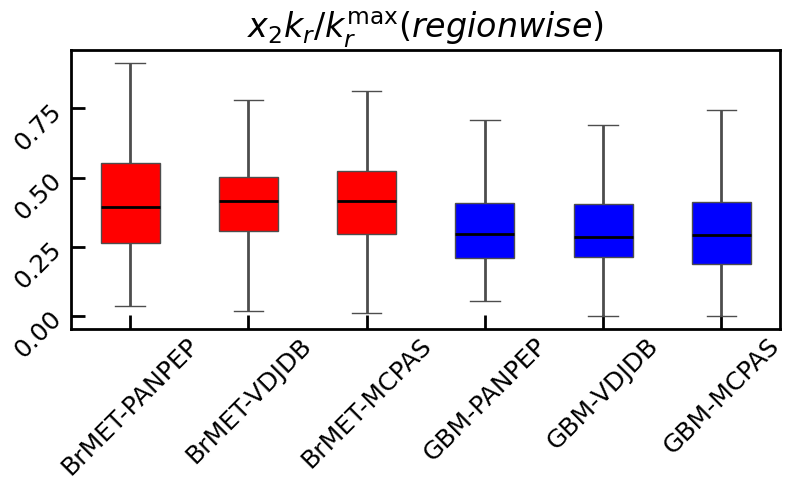

In [12]:
parameters_df = pd.read_excel('/home/gddaslab/mxp140/tcr_project_ultimate/results/results.xlsx', engine='openpyxl', sheet_name='parameters')
full_data_panpep = pd.read_csv('/home/gddaslab/mxp140/tcr_project_ultimate/data/BrMET_and_GBM_data-PANPEP.csv', sep=',')
full_data_vdjdb = pd.read_csv('/home/gddaslab/mxp140/tcr_project_ultimate/data/BrMET_and_GBM_data-ERGO-II.csv', sep=',', usecols=['Patient', 'CDR3', 'counts', 'kr_vdjdb'])
full_data_vdjdb.rename(columns={'kr_vdjdb':'kr'}, inplace=True)
full_data_mcpas = pd.read_csv('/home/gddaslab/mxp140/tcr_project_ultimate/data/BrMET_and_GBM_data-ERGO-II.csv', sep=',', usecols=['Patient', 'CDR3', 'counts', 'kr_mcpas'])
full_data_mcpas.rename(columns={'kr_mcpas':'kr'}, inplace=True)
max_kr_panpep = max(full_data_panpep['kr'])
max_kr_vdjdb = max(full_data_vdjdb['kr'])
max_kr_mcpas = max(full_data_mcpas['kr'])
max_kr_dict = {'panpep':max_kr_panpep, 'vdjdb':max_kr_vdjdb, 'mcpas':max_kr_mcpas}
vdjdb_dir = mcpas_dir = '/home/gddaslab/mxp140/tcr_project_ultimate/data/glioblastoma_data/ERGOII'
panpep_dir = '/home/gddaslab/mxp140/tcr_project_ultimate/data/glioblastoma_data/PANPEP'

########################################## PANPEP ##########################################
x2_times_kr_values_panpep_df = pd.DataFrame(columns=['Patient', 'x2*kr', 'counts', 'dataset'])
for patient_id in full_data_panpep['Patient'].unique():
    # print(patient_id)
    regionwise_filepaths = [dir for dir in os.listdir(f'{panpep_dir}/{patient_id}') if f'{patient_id}' in dir]
    for filepath in regionwise_filepaths:
        region = re.split('_|\\.', filepath)[1]
        # print(region)
        data_panpep = pd.read_csv(f'{panpep_dir}/{patient_id}/{filepath}', sep=',')
        scaled_kr_values = data_panpep['kr']/max_kr_dict.get('panpep')
        x2_value = parameters_df[(parameters_df['Patient'] == patient_id) & (parameters_df['Region'] == region)]['x2_panpep'].values[0]
        # print(f'{patient_id}-{region}: {x2_value}')
        x2_times_kr_values = x2_value * scaled_kr_values
        sub_df = pd.DataFrame({'Patient':[f'{patient_id}-{region}'] * len(x2_times_kr_values), 'x2*kr': x2_times_kr_values, 'counts':data_panpep['counts'].values, 'dataset':f'{re.split(r"\d+", patient_id)[0]}-PANPEP'})
        x2_times_kr_values_panpep_df = pd.concat([x2_times_kr_values_panpep_df, sub_df], ignore_index=True)

########################################## VDJDB ##########################################
x2_times_kr_values_vdjdb_df = pd.DataFrame(columns=['Patient', 'x2*kr', 'dataset'])
for patient_id in full_data_vdjdb['Patient'].unique():
    # print(patient_id)
    regionwise_filepaths = [dir for dir in os.listdir(f'{vdjdb_dir}/{patient_id}') if f'{patient_id}' in dir]
    for filepath in regionwise_filepaths:
        region = re.split('_|\\.', filepath)[1]
        # print(region)
        data_vdjdb = pd.read_csv(f'{vdjdb_dir}/{patient_id}/{filepath}', sep=',')
        scaled_kr_values = data_vdjdb['kr_vdjdb']/max_kr_dict.get('vdjdb')
        x2_value = parameters_df[(parameters_df['Patient'] == patient_id) & (parameters_df['Region'] == region)]['x2_vdjdb'].values[0]
        # print(f'{patient_id}-{region}: {x2_value}')
        x2_times_kr_values = x2_value * scaled_kr_values
        sub_df = pd.DataFrame({'Patient':[f'{patient_id}-{region}'] * len(x2_times_kr_values), 'x2*kr': x2_times_kr_values,  'counts':data_vdjdb['counts'].values, 'dataset':f'{re.split(r"\d+", patient_id)[0]}-VDJDB'})
        x2_times_kr_values_vdjdb_df = pd.concat([x2_times_kr_values_vdjdb_df, sub_df], ignore_index=True)

########################################## MCPAS ##########################################
x2_times_kr_values_mcpas_df = pd.DataFrame(columns=['Patient', 'x2*kr', 'dataset'])
for patient_id in full_data_mcpas['Patient'].unique():
    # print(patient_id)
    regionwise_filepaths = [dir for dir in os.listdir(f'{mcpas_dir}/{patient_id}') if f'{patient_id}' in dir]
    for filepath in regionwise_filepaths:
        region = re.split('_|\\.', filepath)[1]
        # print(region)
        data_mcpas = pd.read_csv(f'{mcpas_dir}/{patient_id}/{filepath}', sep=',')
        scaled_kr_values = data_mcpas['kr_mcpas']/max_kr_dict.get('mcpas')
        x2_value = parameters_df[(parameters_df['Patient'] == patient_id) & (parameters_df['Region'] == region)]['x2_mcpas'].values[0]
        # print(f'{patient_id}-{region}: {x2_value}')
        x2_times_kr_values = x2_value * scaled_kr_values
        sub_df = pd.DataFrame({'Patient':[f'{patient_id}-{region}'] * len(x2_times_kr_values), 'x2*kr': x2_times_kr_values,  'counts':data_mcpas['counts'].values, 'dataset':f'{re.split(r"\d+", patient_id)[0]}-MCPAS'})
        x2_times_kr_values_mcpas_df = pd.concat([x2_times_kr_values_mcpas_df, sub_df], ignore_index=True)
        
all_dfs = pd.concat([x2_times_kr_values_panpep_df, x2_times_kr_values_vdjdb_df, x2_times_kr_values_mcpas_df])
order_we_want = ['BrMET-PANPEP', 'BrMET-VDJDB', 'BrMET-MCPAS', 'GBM-PANPEP', 'GBM-VDJDB', 'GBM-MCPAS']
dfs_in_order_we_want = [all_dfs[all_dfs['dataset']==order] for order in order_we_want]
all_dfs_in_order_we_want = pd.concat(dfs_in_order_we_want)
print(all_dfs_in_order_we_want)

print('P-VALUE TABLE\n=============================================')
pvalue_df = pd.DataFrame(order_we_want, columns=['Dataset'])
pvalue_df['BrMET-PANPEP'] = [f'{ttest_ind(all_dfs_in_order_we_want[all_dfs_in_order_we_want['dataset']=='BrMET-PANPEP']['x2*kr'].values.astype(float), all_dfs_in_order_we_want[all_dfs_in_order_we_want['dataset']==dataset]['x2*kr'].values.astype(float), equal_var=False).pvalue:.4f}' for dataset in order_we_want]
pvalue_df['BrMET-VDJDB'] = [f'{ttest_ind(all_dfs_in_order_we_want[all_dfs_in_order_we_want['dataset']=='BrMET-VDJDB']['x2*kr'].values.astype(float), all_dfs_in_order_we_want[all_dfs_in_order_we_want['dataset']==dataset]['x2*kr'].values.astype(float), equal_var=False).pvalue:.4f}' for dataset in order_we_want]
pvalue_df['BrMET-MCPAS'] = [f'{ttest_ind(all_dfs_in_order_we_want[all_dfs_in_order_we_want['dataset']=='BrMET-MCPAS']['x2*kr'].values.astype(float), all_dfs_in_order_we_want[all_dfs_in_order_we_want['dataset']==dataset]['x2*kr'].values.astype(float), equal_var=False).pvalue:.4f}' for dataset in order_we_want]
pvalue_df['GBM-PANPEP'] = [f'{ttest_ind(all_dfs_in_order_we_want[all_dfs_in_order_we_want['dataset']=='GBM-PANPEP']['x2*kr'].values.astype(float), all_dfs_in_order_we_want[all_dfs_in_order_we_want['dataset']==dataset]['x2*kr'].values.astype(float), equal_var=False).pvalue:.4f}' for dataset in order_we_want]
pvalue_df['GBM-VDJDB'] = [f'{ttest_ind(all_dfs_in_order_we_want[all_dfs_in_order_we_want['dataset']=='GBM-VDJDB']['x2*kr'].values.astype(float), all_dfs_in_order_we_want[all_dfs_in_order_we_want['dataset']==dataset]['x2*kr'].values.astype(float), equal_var=False).pvalue:.4f}' for dataset in order_we_want]
pvalue_df['GBM-MCPAS'] = [f'{ttest_ind(all_dfs_in_order_we_want[all_dfs_in_order_we_want['dataset']=='GBM-MCPAS']['x2*kr'].values.astype(float), all_dfs_in_order_we_want[all_dfs_in_order_we_want['dataset']==dataset]['x2*kr'].values.astype(float), equal_var=False).pvalue:.4f}' for dataset in order_we_want]
display(pvalue_df)

colors = {'BrMET-PANPEP': 'red', 'GBM-PANPEP': 'blue', 'BrMET-VDJDB': 'red', 'GBM-VDJDB': 'blue', 'BrMET-MCPAS': 'red', 'GBM-MCPAS': 'blue'}
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
# Create plots
sns.boxplot(
    x="dataset", 
    y='x2*kr',
    data=all_dfs_in_order_we_want,
    hue="dataset",
    palette=colors,
    saturation=1,
    legend=False,
    width=0.5,
    ax=ax,
    medianprops={"color": "black", "linewidth": 2},
    whiskerprops={"linewidth": 2},
    showfliers=False
)

# Configure each subplot
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_title(r'$x_2k_r/k^{\text{max}}_r(regionwise)$', fontsize=24)
ax.set_xlabel("")
ax.set_ylabel("")

# Set formatting
xtick_labels, ytick_labels = ax.get_xticklabels(), ax.get_yticklabels()
for label in xtick_labels + ytick_labels:
    label.set_fontsize(24)
    label.set_rotation(45)
ax.tick_params(axis="x", which="major", direction="in", length=10, width=2, labelsize=18)
ax.tick_params(axis="x", which="minor", direction="in", length=5, width=2, labelsize=18)
ax.tick_params(axis="y", which="major", direction="in", length=10, width=2, labelsize=18)
ax.tick_params(axis="y", which="minor", direction="in", length=5, width=2, labelsize=18)
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.spines["top"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
ax.yaxis.labelpad = 20
ax.xaxis.labelpad = 20

plt.tight_layout()
plt.show()

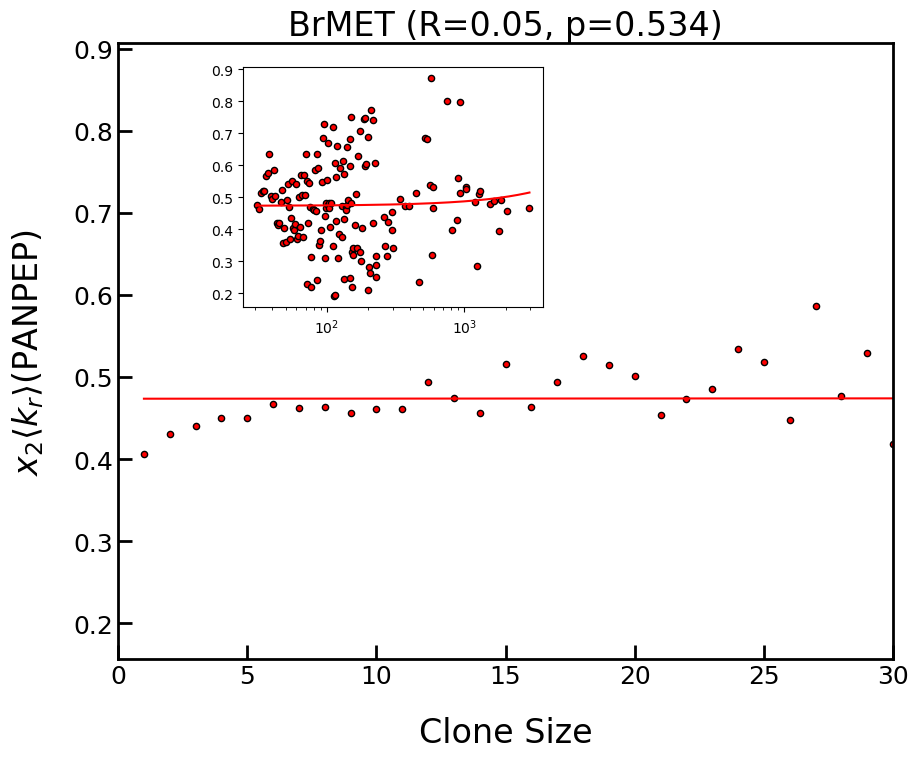

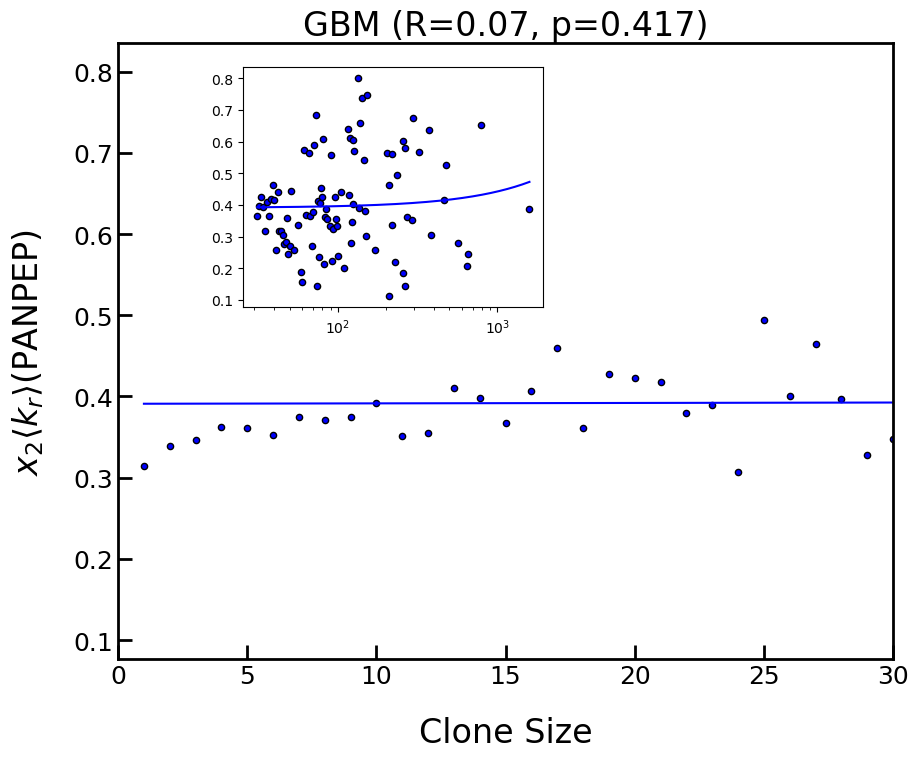

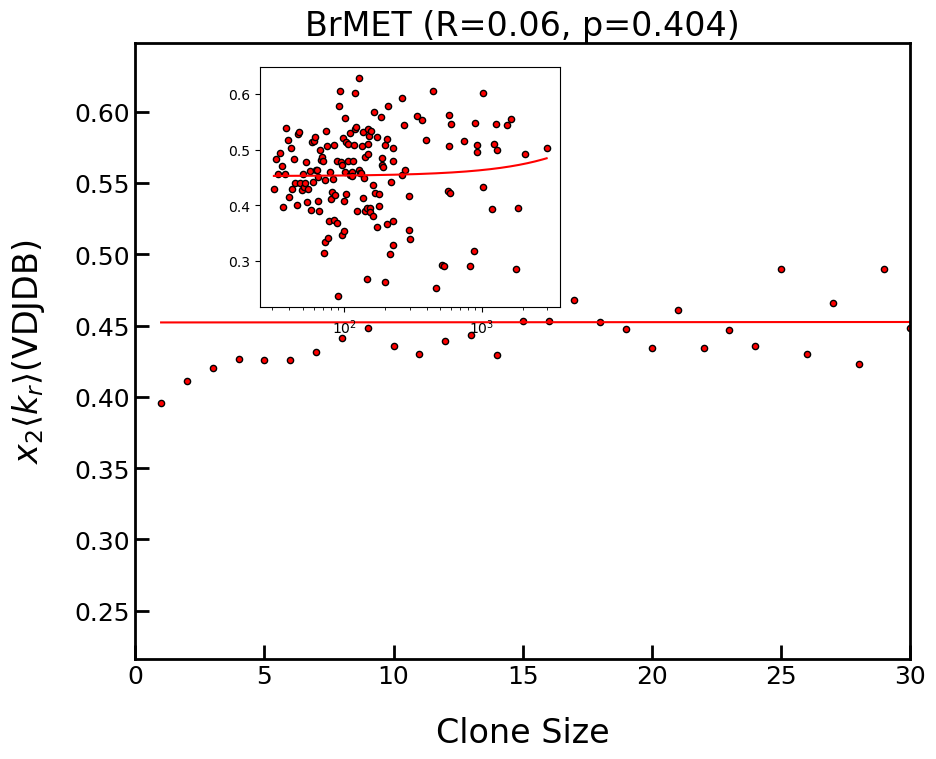

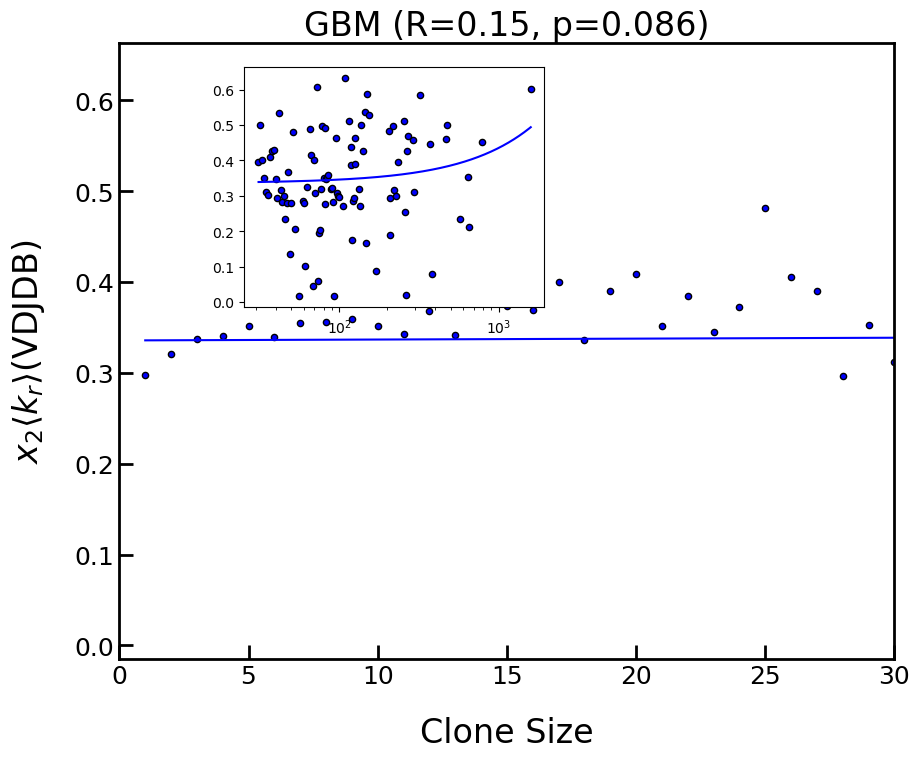

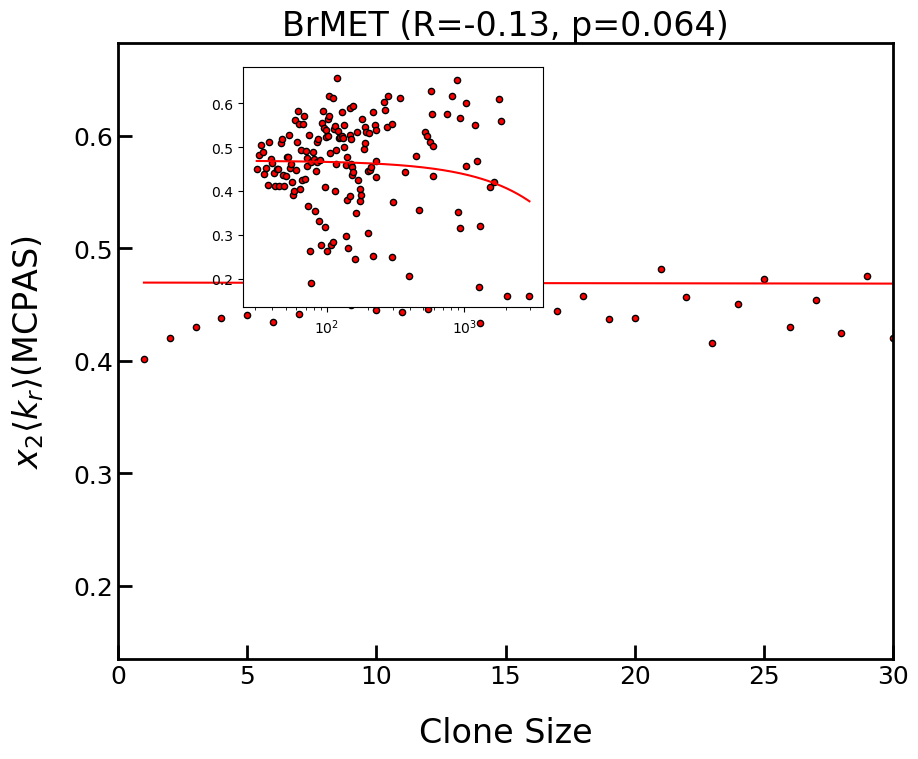

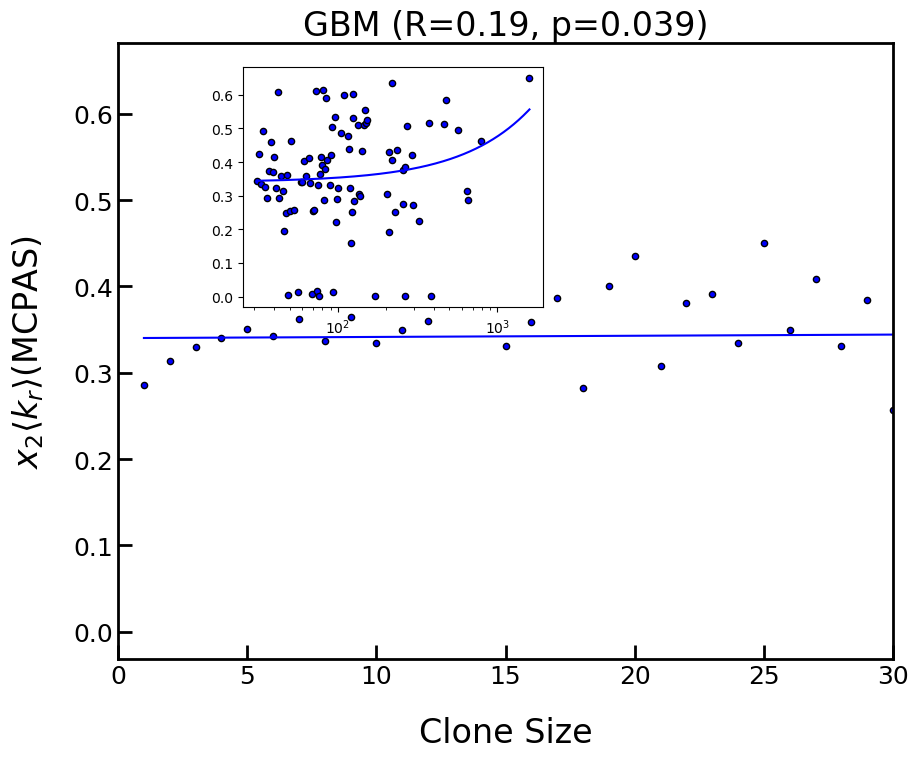

In [13]:
dataset_type = ['PANPEP', 'VDJDB', 'MCPAS']
for j in range(len(dataset_type)):
    req_df = all_dfs_in_order_we_want[all_dfs_in_order_we_want['dataset'].str.contains(dataset_type[j])]
    req_df_brmet = req_df[req_df['Patient'].str.contains('BrMET')].groupby('counts').agg({'x2*kr':'mean', 'Patient':'first'}).reset_index()
    req_df_gbm = req_df[req_df['Patient'].str.contains('GBM')].groupby('counts').agg({'x2*kr':'mean', 'Patient':'first'}).reset_index()
    patient_group = ['BrMET', 'GBM']
    req_df_list = [req_df_brmet, req_df_gbm]
    colors = ['red', 'blue']
    for i, df in enumerate(req_df_list):
        x = df['counts'].values.astype(float)
        y = df['x2*kr'].values.astype(float)
        corr = pearsonr(x, y)
        # print(pearsonr(x[x > 30], y[x > 30]))
        title = f'{patient_group[i]} (R={corr.statistic:.2f}, p={corr.pvalue:.3f})'
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
        ax.scatter(x, y, s=20, color=colors[i], edgecolor='black', alpha=1)
        slope, intercept, r_value, p_value, std_err = linregress(x, y)
        x_range = np.linspace(min(x), max(x), 1000)
        ax.plot(x_range, slope * x_range + intercept, color=colors[i], )
        ax.set_xlabel('Clone Size', fontsize=24)
        ax.set_ylabel(r'$x_2\langle k_r\rangle$' + f'({dataset_type[j]})', fontsize=24)    
        ax.tick_params(axis='both', which='major', labelsize=16)
        xtick_labels, ytick_labels = ax.get_xticklabels(), ax.get_yticklabels()
        for label in xtick_labels + ytick_labels:
            label.set_fontsize(24)
        ax.tick_params(
            axis="x", which="major", direction="in", length=10, width=2, labelsize=18
        )
        ax.tick_params(
            axis="x", which="minor", direction="in", length=5, width=2, labelsize=18
        )
        ax.tick_params(
            axis="y", which="major", direction="in", length=10, width=2, labelsize=18
        )
        ax.tick_params(
            axis="y", which="minor", direction="in", length=5, width=2, labelsize=18
        )
        ax.spines["bottom"].set_linewidth(2)
        ax.spines["left"].set_linewidth(2)
        ax.spines["top"].set_linewidth(2)
        ax.spines["right"].set_linewidth(2)
        ax.yaxis.labelpad = 20
        ax.xaxis.labelpad = 20
        ax.set_title(title, fontsize=24)

        # Set x-axis limit to 30 and create inset for values larger than 30
        ax.set_xlim(left=min(x)-1, right=30)

        inset_ax = fig.add_axes([0.25, 0.55, 0.3, 0.3])
        inset_ax.scatter(x[x > 30], y[x > 30], s=20, color=colors[i], edgecolor='black', alpha=1)
        inset_ax.plot(x_range[x_range > 30], slope * x_range[x_range > 30] + intercept, color=colors[i])
        inset_ax.set_xscale('log')

        plt.show()